In [1]:
import os

import numpy as np
import torch

import matplotlib.pyplot as plt


from LFIS.config.config import get_configuration, get_baseconfig
from LFIS.LF.LF import LF_base

from LFIS.util.util import (
                    run_stat,
                    save_file,
                    load_file)

In [2]:
def check_parameter(config):
    print(f'Case: {config.case}')
    print(f'Problem: {config.problemtype}')
    print(f'Number of steps: {config.nstep}')
    print(f'Device: {config.device}')
    print(f'Number of dimension: {config.ndim}')
    print(f'Epoch: {config.train.epoch}')
    print(f'Sample size: {config.train.nsample}')
    print(f'Batch size: {config.train.nbatch}')
    print(f'Learning rate: {config.train.lr}')

In [3]:
cfg = get_baseconfig()
configurer = get_configuration()

In [4]:
case = 'funnel'

In [5]:
cfg_funnel = configurer.setup_config(cfg, case)

In [6]:
check_parameter(cfg_funnel)

Case: 10-Dimensional Funnel Distribution
Problem: transform
Number of steps: 256
Device: cuda:1
Number of dimension: 10
Epoch: 2000
Sample size: 200000
Batch size: 20000
Learning rate: 0.004


In [11]:
cfg_funnel.train.nbatch = 10000

In [12]:
trainer = cfg_funnel.train.method

In [13]:
LFmodel = LF_base(cfg_funnel)
LFmodel.to(cfg_funnel.device)

LF_base(
  (flow): NN_Base(
    (layers): Sequential(
      (0): Linear(in_features=10, out_features=64, bias=True)
      (1): Sequential(
        (0): SiLU()
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (2): Sequential(
        (0): SiLU()
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (3): SiLU()
      (4): Linear(in_features=64, out_features=10, bias=True)
    )
  )
)

# Train LFIS

In [14]:
output = trainer(cfg_funnel)
save_file(case, output)

tensor(0.) tensor(0., device='cuda:1')
time = 0.0000, loss = 0.0000, percetage = nan%
Complete Training Flow at time 0.0000
tensor(0.0039) tensor(0.0695, device='cuda:1')
time = 0.0039, loss = 0.0228, percetage = 99.9904%
time = 0.0039, loss = 0.0004, percetage = 1.3002%
time = 0.0039, loss = 0.0001, percetage = 0.4069%
time = 0.0039, loss = 0.0000, percetage = 0.1866%
time = 0.0039, loss = 0.0001, percetage = 0.4069%
time = 0.0039, loss = 0.0000, percetage = 0.1220%
time = 0.0039, loss = 0.0000, percetage = 0.0852%
===Reducing LR====
time = 0.0039, loss = 0.0000, percetage = 0.0444%
Complete Training Flow at time 0.0039
tensor(0.0078) tensor(0.1388, device='cuda:1')
time = 0.0078, loss = 0.0243, percetage = 24.4419%
time = 0.0078, loss = 0.0005, percetage = 0.5879%
time = 0.0078, loss = 0.0001, percetage = 0.0757%
time = 0.0078, loss = 0.0001, percetage = 0.0385%
Complete Training Flow at time 0.0078
tensor(0.0117) tensor(0.2076, device='cuda:1')
time = 0.0117, loss = 0.0215, percetag

# Load pre-trained LFIS

In [15]:
nnmodel = cfg_funnel.nnmodel.to(cfg_funnel.device)
output = load_file(case, nnmodel)

In [16]:
logstat = run_stat(LFmodel, output)

In [17]:
logstat

{'logzmean': -0.06275029152312114,
 'logzstd': 0.006679656039908975,
 'samples': array([[ 9.94561100e-01, -1.10615510e+00, -7.23052654e-02, ...,
          2.86775018e+00,  1.95541421e-01, -1.01474833e+00],
        [ 3.79300405e+00,  3.50548819e+00,  7.52935249e+00, ...,
         -7.26037495e+00,  8.72222943e+00,  2.18020851e+00],
        [ 1.89471237e+00, -1.12922819e+00, -2.01569739e+00, ...,
          1.29763867e+00, -8.69318628e-01,  4.23072365e+00],
        ...,
        [ 1.80713218e+00, -1.72989747e+00,  1.61322998e+00, ...,
          1.22115155e-01, -7.10570292e-01, -7.42643187e-01],
        [ 2.31799839e+00,  5.44923838e-01, -1.73799682e+00, ...,
          7.40038601e+00,  2.35772979e+00, -2.39869060e+00],
        [-3.61701580e+00, -1.46281792e-01,  1.80590222e-01, ...,
         -1.66430055e-01, -5.80486718e-03,  3.01176319e-02]]),
 'weight': array([1.12667645, 1.60090672, 1.23385797, ..., 1.0715475 , 1.39436762,
        1.21431643]),
 'logzlist': array([-0.06765323, -0.06049174

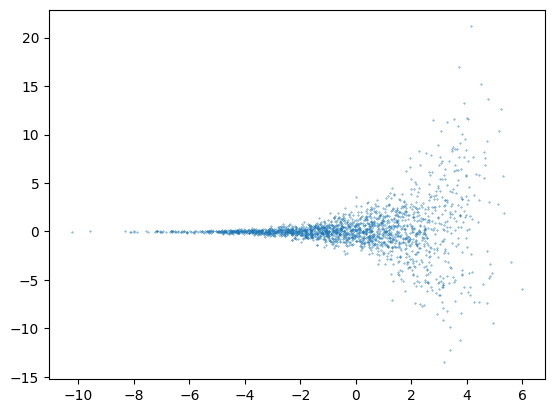

In [18]:
samples = logstat['samples']
plt.scatter(samples[:,0],samples[:,1], s = 0.1)